# GeoPandas

In [1]:
# %pip install --upgrade geopandas
# %pip install --upgrade descartes
# %pip install --upgrade mapclassify
# %pip install --upgrade fiona

In [2]:
import geopandas as gpd

In [3]:
%matplotlib inline

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [5]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [6]:
world_cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [7]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


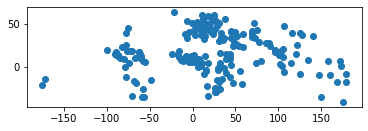

In [8]:
world_cities.plot()

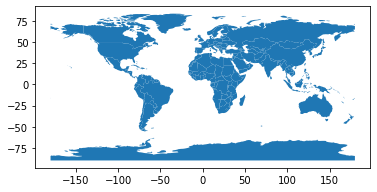

In [9]:
world.plot()

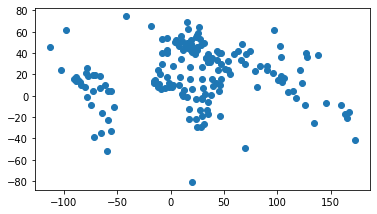

In [10]:
world['centroid_column'] = world.centroid
world = world.set_geometry('centroid_column')
world.plot()

In [11]:
world.geometry.name

'centroid_column'

In [12]:
import fiona

In [13]:
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

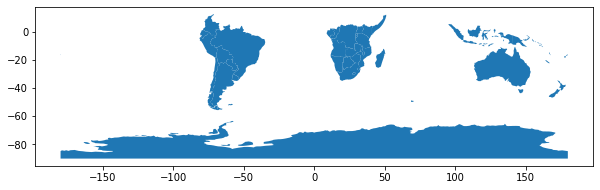

In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
southern_world = world.cx[:, :0]
southern_world.plot(figsize=(10, 3))

In [15]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997033076265 49.21498078062912,..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819135928291 41.30864166926936,..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,(POLYGON ((141.0002104025918 -2.60015105551566...
8,260580739,Asia,Indonesia,IDN,3028000.0,(POLYGON ((141.0002104025918 -2.60015105551566...
9,44293293,South America,Argentina,ARG,879400.0,(POLYGON ((-68.63401022758323 -52.636370458874...


/home/hsm/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


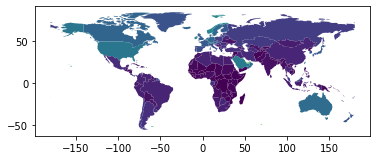

In [16]:
world = world[(world.pop_est > 0) & (world.continent != "Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap')

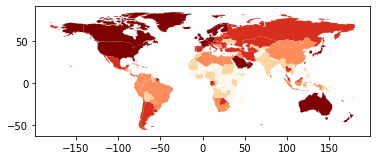

In [17]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

In [18]:
seoul = gpd.read_file('asset/seoul_shp')

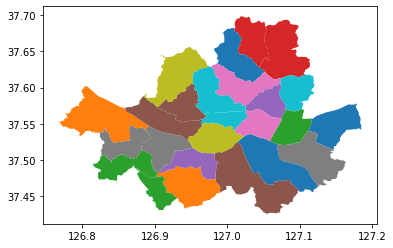

In [19]:
seoul.plot(column='name')

In [20]:
seoul.head()

,code,name,name_eng,base_year,geometry
0,11250,강동구,Gangdong-gu,2013,"POLYGON ((127.1151958498161 37.55753318070492,..."
1,11240,송파구,Songpa-gu,2013,"POLYGON ((127.0690698130372 37.52227942350503,..."
2,11230,강남구,Gangnam-gu,2013,"POLYGON ((127.058673592884 37.52629974922568, ..."
3,11220,서초구,Seocho-gu,2013,"POLYGON ((127.0139711966751 37.52503988289669,..."
4,11210,관악구,Gwanak-gu,2013,"POLYGON ((126.9610898906183 37.49100376129394,..."


In [21]:
seoul['coords'] = seoul['geometry'].apply(
    lambda x: x.representative_point().coords[:])
seoul['coords'] = [coords[0] for coords in seoul['coords']]

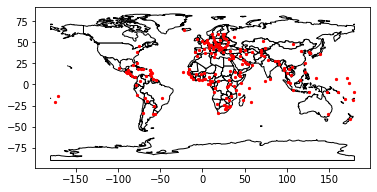

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

base = world.plot(color='white', edgecolor='black')

cities.plot(ax=base, marker='o', color='red', markersize=5)

In [23]:
import matplotlib.pyplot as plt

In [24]:
import matplotlib.font_manager as fm
plt.rcParams["font.family"] = 'NanumMyeongjo'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14, 4)
# font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# print(font_list)

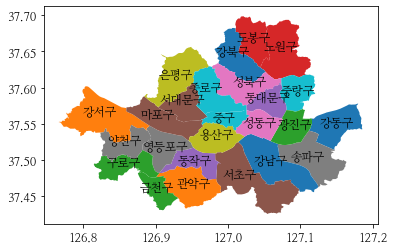

In [25]:
seoul.plot(column='name')
for idx, row in seoul.iterrows():
    plt.annotate(s=row['name'], xy=row['coords'], horizontalalignment='center')

In [26]:
import matplotlib.font_manager as fm
plt.rcParams["font.family"] = 'NanumMyeongjo'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14, 4)
# font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# print(font_list)

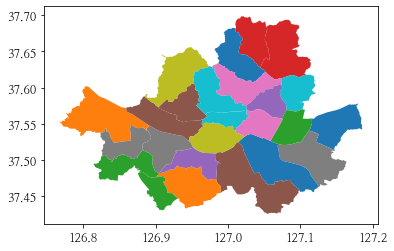

In [27]:
fig, ax = plt.subplots()
seoul.plot(ax=ax, column='name')

In [28]:
seoul_x = seoul.centroid.apply(lambda p: p.x)
seoul_y = seoul.centroid.apply(lambda p: p.y)

In [29]:
len(seoul_x)

25

In [30]:
seoulcen = seoul.copy()
seoulcen['geometry'] = seoul.geometry.centroid

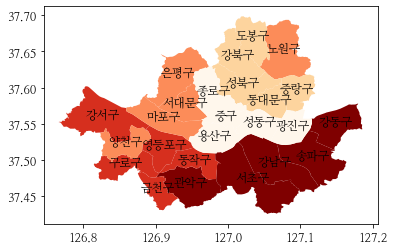

In [31]:
seoul.plot(column='code', cmap='OrRd', scheme='quantiles')
for idx, row in seoulcen.iterrows():
    plt.annotate(s=row['name'],
                 xy=[row['geometry'].x, row['geometry'].y],
                 horizontalalignment='center')

In [32]:
# for name, centroid in zip(seoul.name, seoul.centroid):
#     print(i)
#plt.text(centroid, name, fontsize=12)

In [33]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


In [34]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Check original projection
# (it's Platte Carre! x-y are long and lat)
world.crs

{'init': 'epsg:4326'}

/home/hsm/.venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hsm/.venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


Text(0.5, 1, 'WGS84 (lat/lon)')

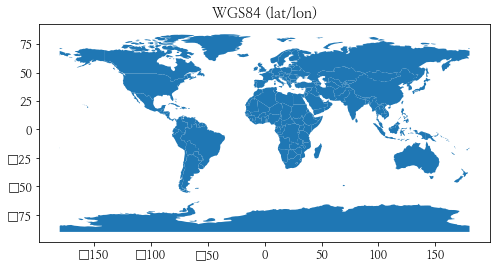

In [35]:
# Visualize
ax = world.plot()

ax.set_title("WGS84 (lat/lon)")

Text(0.5, 1, 'Mercator')

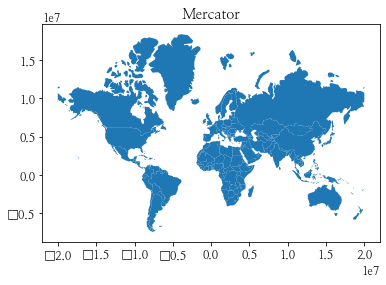

In [36]:
# Reproject to Mercator (after dropping Antartica)
world = world[(world.name != "Antarctica")
              & (world.name != "Fr. S. Antarctic Lands")]

# world.to_crs(epsg=3395) would also work
world = world.to_crs({'init': 'epsg:3395'})

ax = world.plot()

ax.set_title("Mercator")

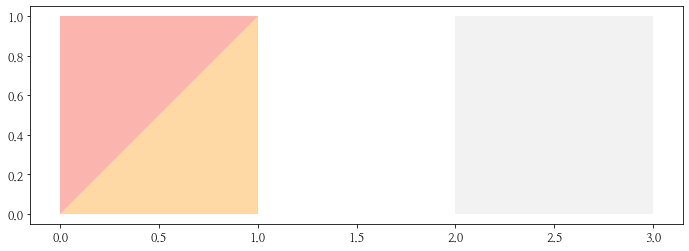

In [37]:
from shapely.geometry import Polygon

p1 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])

g = gpd.GeoSeries([p1, p2, p3])
g.plot(cmap='Pastel1')

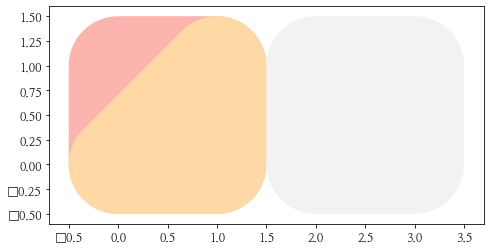

In [38]:
g.buffer(0.5).plot(cmap='Pastel1')

In [39]:
nybb_path = gpd.datasets.get_path('nybb')
boros = gpd.GeoDataFrame.from_file(nybb_path)
boros.set_index('BoroCode', inplace=True)
boros = boros.sort_index()
boros

,BoroName,Shape_Leng,Shape_Area,geometry
BoroCode,,,,
1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((981219.0557861328 188655.3157958984...
2,Bronx,464392.991824,1.186925e+09,(POLYGON ((1012821.805786133 229228.2645874023...
3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((1021176.479003906 151374.7969970703...
4,Queens,896344.047763,3.045213e+09,(POLYGON ((1029606.076599121 156073.8142089844...
5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((970217.0223999023 145643.3322143555...


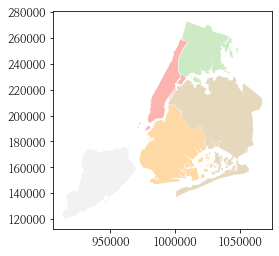

In [40]:
boros.plot(cmap='Pastel1')

In [41]:
from shapely.geometry import Point
import numpy as np

xmin, xmax, ymin, ymax = 900000, 1080000, 120000, 280000

xc = (xmax - xmin) * np.random.random(2000) + xmin

yc = (ymax - ymin) * np.random.random(2000) + ymin

pts = gpd.GeoSeries([Point(x, y) for x, y in zip(xc, yc)])

In [42]:
circles = pts.buffer(2000)

In [43]:
mp = circles.unary_union

In [44]:
holes = boros['geometry'].intersection(mp)

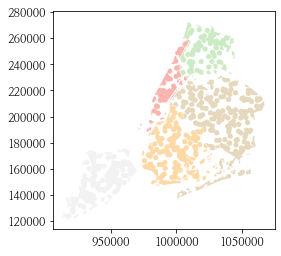

In [45]:
holes.plot(cmap='Pastel1')

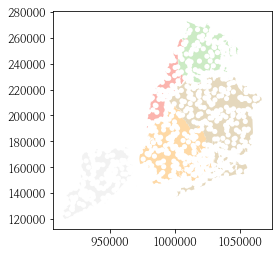

In [46]:
circles = pts.buffer(2000)  # 2000 안에 있는 Points만 남김

mp = circles.unary_union  # circles를 하나로 합침

boros_with_holes = boros['geometry'].difference(mp)

boros_with_holes.plot(cmap='Pastel1')

In [47]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry']]
continents = world.dissolve(by='continent')
continents.head()

,geometry
continent,
Africa,(POLYGON ((49.54351891459575 -12.4698328589405...
Antarctica,(POLYGON ((-163.7128956777287 -78.595667413241...
Asia,(POLYGON ((120.2950142762069 -10.2586499976035...
Europe,(POLYGON ((-51.65779741067889 4.15623240805302...
North America,"(POLYGON ((-61.68000000000001 10.76, -61.105 1..."


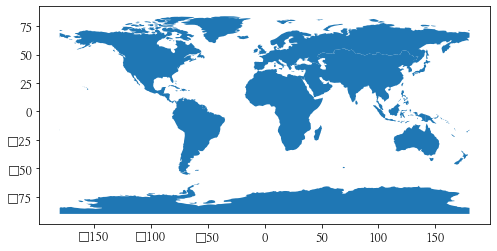

In [48]:
continents.plot()

In [49]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry', 'pop_est']]
continents = world.dissolve(by='continent', aggfunc='sum')
continents.head()

,geometry,pop_est
continent,,
Africa,(POLYGON ((49.54351891459575 -12.4698328589405...,1219176238
Antarctica,(POLYGON ((-163.7128956777287 -78.595667413241...,4050
Asia,(POLYGON ((120.2950142762069 -10.2586499976035...,4389144868
Europe,(POLYGON ((-51.65779741067889 4.15623240805302...,746398461
North America,"(POLYGON ((-61.68000000000001 10.76, -61.105 1...",573042112


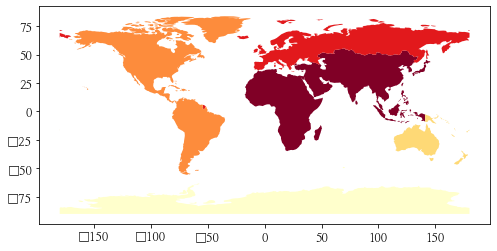

In [50]:
continents.plot(column='pop_est', scheme='quantiles', cmap='YlOrRd')